In [133]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [134]:
data = pd.read_csv('File/cuckoos.csv')

In [135]:
data

,Unnamed: 0,length,breadth,species,id
0,1,21.7,16.1,meadow.pipit,21
1,2,22.6,17.0,meadow.pipit,22
2,3,20.9,16.2,meadow.pipit,23
3,4,21.6,16.2,meadow.pipit,24
4,5,22.2,16.9,meadow.pipit,25
...,...,...,...,...,...
115,116,22.0,16.0,wren,234
116,117,20.0,15.7,wren,235
117,118,20.8,15.9,wren,236
118,119,21.2,16.0,wren,237


In [136]:
clear_data = data.drop('Unnamed: 0', axis=1)

In [137]:
clear_data = clear_data.loc[clear_data[['species']].replace(clear_data.species.value_counts().to_dict()).sort_values('species', ascending=False).index]
# nice sort by query in column

In [138]:
clear_data.loc[clear_data.id == 236]
# check to our values

,length,breadth,species,id
117,20.8,15.9,wren,236


In [139]:
clear_data['species'].unique()

array(['meadow.pipit', 'robin', 'pied.wagtail', 'wren', 'tree.pipit',
       'hedge.sparrow'], dtype=object)

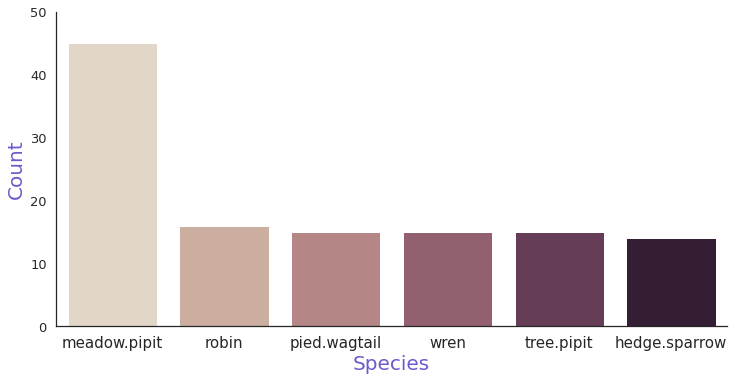

In [140]:
gist_species = sns.catplot(x="species", kind="count", palette="ch:.25", data=clear_data, 
            aspect=2)
gist_species.set_xticklabels(fontsize=15)
gist_species.set_yticklabels(fontsize=13)
gist_species.set_xlabels(fontsize=20, color='slateblue', label='Species')
gist_species.set_ylabels(fontsize=20, color='slateblue', label='Count')

In [141]:
clear_data['species'].value_counts()

meadow.pipit     45
robin            16
tree.pipit       15
pied.wagtail     15
wren             15
hedge.sparrow    14
Name: species, dtype: int64

In [142]:
clear_data = clear_data.drop('id', axis=1)

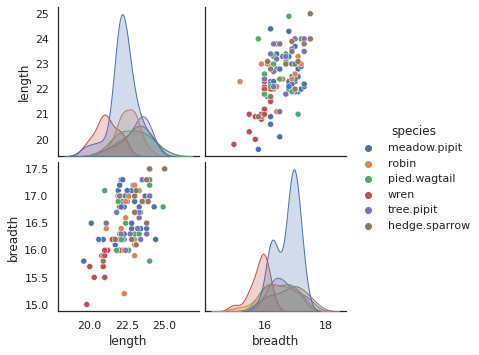

In [143]:
sns.pairplot(clear_data, hue='species')


In [144]:
clear_fit_data = pd.get_dummies(clear_data)

In [145]:
clear_sup_data = clear_data.replace(to_replace=['meadow.pipit',
                                                'robin','tree.pipit','pied.wagtail',
                                                'wren','hedge.sparrow'],
                                    value=[1, 2, 3, 4, 5, 6])

In [146]:
clear_sup_data

,length,breadth,species
0,21.7,16.1,1
34,21.7,16.2,1
25,22.8,17.1,1
26,22.0,16.9,1
27,23.4,16.4,1
...,...,...,...
68,22.8,16.2,6
69,23.1,17.1,6
70,23.1,16.1,6
71,23.5,16.9,6


<AxesSubplot:>

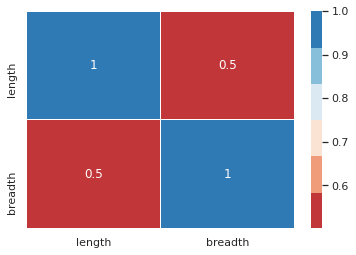

In [147]:
sns.heatmap(clear_data.corr(), 
            cmap= sns.color_palette(palette="RdBu"),
            linewidths=0.5,annot=True) 

<AxesSubplot:>

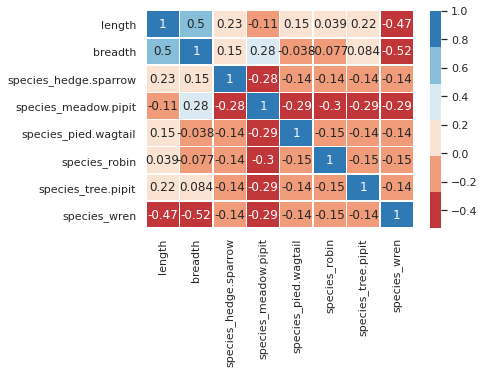

In [148]:
sns.heatmap(clear_fit_data.corr(), 
            cmap= sns.color_palette(palette="RdBu"),
            linewidths=0.5,annot=True) 

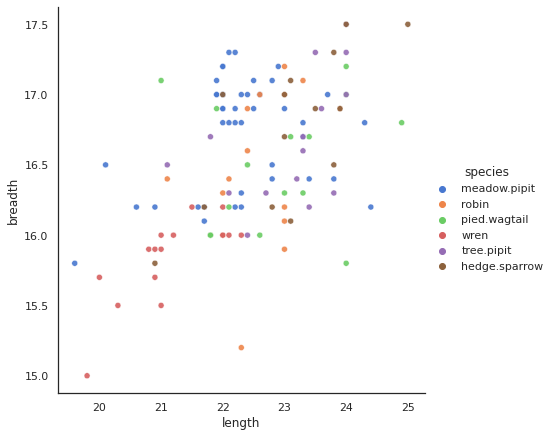

In [149]:
sns.set_theme(style="white")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="length", y="breadth", hue="species",
            alpha=.9, palette="muted",
            height=6, data=clear_data)

In [150]:
y = clear_data['species']

In [151]:
X = clear_data[['length', 'breadth']]

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [153]:
parametrs = {
    'n_estimators': list(range(10, 50, 10)),
    'max_depth': list(range(1, 12, 2)),
    'min_samples_leaf': list(range(1, 7)),
    'min_samples_split': list(range(2, 9, 2))
}

In [154]:
clf_rf = RandomForestClassifier()

In [155]:
parametrs = {'n_estimators': [10, 20, 30, 35, 40, 45], 'max_depth': [1, 2, 3, 5, 7, 10]}

In [156]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5)

In [157]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 5, 7, 10],
                         'n_estimators': [10, 20, 30, 35, 40, 45]})

In [158]:
print(grid_search_cv_clf.best_params_, 
      grid_search_cv_clf.best_score_)

{'max_depth': 2, 'n_estimators': 20} 0.4333333333333333


In [159]:
predictions = grid_search_cv_clf.predict(X_test)

In [162]:
confusion_matrix(y_test, predictions)

array([[0, 1, 0, 0, 1, 1],
       [0, 9, 0, 1, 3, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 3, 0, 0, 0, 0],
       [0, 1, 0, 1, 1, 0],
       [0, 0, 0, 2, 0, 4]])

<AxesSubplot:>

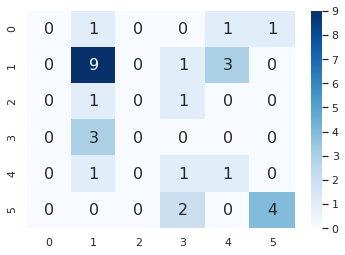

In [164]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, 
            annot_kws={"size": 16}, cmap='Blues')